###  1.) Problem Statement definition and Basic metrics analysis
The dataset is of a video streaming platform (Netflix). The data given indicates the details about Movies and TV shows.
* Problem Statement definition: The data can be used to derive insights to find out which movies/shows need to be created.
 Also, it is expected to give few insights on how to grow this business in different countries

 Let's now move forward to have a look at the data, and analyse the basic metrics



In [2261]:
#Importing Necessary libraries (We will keep on importing libraries in this cell)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2262]:
Netflix_data= pd.read_csv('netflix.txt')

# Shape -> Rows,columns
print('Shape of the data set is as follows: ')
print('No. of Rows: '+ str(Netflix_data.shape[0]))
print('No. of Columns: '+ str(Netflix_data.shape[1]))
print('-------------------------------------------')


Shape of the data set is as follows: 
No. of Rows: 8807
No. of Columns: 12
-------------------------------------------


In [2263]:
# Finding out the basic info
print(Netflix_data.info())
print('-------------------------------------------')

# Describing each feature, by listing out the basic metrics

Netflix_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
-------------------------------------------


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN




2.) Observations on the following -
----
1. Shape of data: 
    
    * No. of Columns: 12, No. of Rows: 8807
        *   Column observations
            * There are only two types of data in the column "type" (unique values in column type is 2)
            * Show_id is the unique key as freq = 1, so is the title having all unique values
        * --
        *   Row observations
            * Columns, which have missing or null values are: [director, cast, country, date_added, rating, duration] -> 
            * Nulls need to be handled, Imputed if necessary
----
2. Data type of all attributes
    * The year has int64 (integer) datatype , while the rest are objects
    * There are many np.Nan's (null values in the values of their respective attributes)

----
3. Conversion of categorical attributes to 'category'  (Information derived from .describe )
    * Categorical attributes in this data are: 
       
        * Type (Movie or Tv shows) -> nunique value is 2 for this column
        * Country (Country list) -> nunique value is 748 diffrent countries where the movies were produced
        * Genre (Column name : listed_in) -> Can be categorized to 514 unique genres
----
4. missing value detection
    * Columns, which have missing or null values are: [director, cast, country, date_added, rating, duration] 
----
5. Statistical summary
 -- Need to write


### 3. Non-Graphical Analysis: Value counts and unique attributes

* We can omit the values counts of the following columns: 
    * [show_id,title] -> because they are unique for each row and no point in getting it's value counts
    * [director,cast,date_added,release_year,description] -> Because these don't appear to be categorical values, 
    even if they have a large number of categories

In [2264]:
# Unique attributes 
print("Type:  "+ str(Netflix_data['type'].value_counts().count()) )
print("Country: "+str(Netflix_data['country'].value_counts().count()))
print("Genre: "+str(Netflix_data['listed_in'].value_counts().count()))
print("Rating: "+str(Netflix_data['rating'].value_counts().count()))
print("Duration: "+str(Netflix_data['duration'].value_counts().count()))
print("-------------------------")



Type:  2
Country: 748
Genre: 514
Rating: 17
Duration: 220
-------------------------


In [2265]:

#Value counts of each categorical attributes

print("Type value count stats: ")
print(Netflix_data['type'].value_counts().to_frame().reset_index())
print("-------------------------")

print("Country value count stats: ")
print(Netflix_data['country'].value_counts().to_frame().reset_index())
print("-------------------------")



Type value count stats: 
      type  count
0    Movie   6131
1  TV Show   2676
-------------------------
Country value count stats: 
                                    country  count
0                             United States   2818
1                                     India    972
2                            United Kingdom    419
3                                     Japan    245
4                               South Korea    199
..                                      ...    ...
743              Romania, Bulgaria, Hungary      1
744                      Uruguay, Guatemala      1
745                France, Senegal, Belgium      1
746  Mexico, United States, Spain, Colombia      1
747            United Arab Emirates, Jordan      1

[748 rows x 2 columns]
-------------------------


In [2266]:

print("Genre value count stats: ")
print(Netflix_data['listed_in'].value_counts().to_frame().reset_index())
print("-------------------------")

print("Rating value count stats: ")
print(Netflix_data['rating'].value_counts().to_frame().reset_index())
print("-------------------------")

Genre value count stats: 
                                             listed_in  count
0                         Dramas, International Movies    362
1                                        Documentaries    359
2                                      Stand-Up Comedy    334
3               Comedies, Dramas, International Movies    274
4     Dramas, Independent Movies, International Movies    252
..                                                 ...    ...
509         Kids' TV, TV Action & Adventure, TV Dramas      1
510                  TV Comedies, TV Dramas, TV Horror      1
511   Children & Family Movies, Comedies, LGBTQ Movies      1
512  Kids' TV, Spanish-Language TV Shows, Teen TV S...      1
513                     Cult Movies, Dramas, Thrillers      1

[514 rows x 2 columns]
-------------------------
Rating value count stats: 
      rating  count
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y 

In [2267]:
print("Duration value count stats: ")
print(Netflix_data['duration'].value_counts().to_frame().reset_index())
print("-------------------------")


print("Director value count stats: ")
print(Netflix_data['director'].value_counts().to_frame().reset_index())
print("-------------------------")

Duration value count stats: 
      duration  count
0     1 Season   1793
1    2 Seasons    425
2    3 Seasons    199
3       90 min    152
4       94 min    146
..         ...    ...
215     16 min      1
216    186 min      1
217    193 min      1
218    189 min      1
219    191 min      1

[220 rows x 2 columns]
-------------------------
Director value count stats: 
                            director  count
0                      Rajiv Chilaka     19
1             Raúl Campos, Jan Suter     18
2                       Marcus Raboy     16
3                        Suhas Kadav     16
4                          Jay Karas     14
...                              ...    ...
4523  Raymie Muzquiz, Stu Livingston      1
4524                    Joe Menendez      1
4525                      Eric Bross      1
4526                  Will Eisenberg      1
4527                     Mozez Singh      1

[4528 rows x 2 columns]
-------------------------


### Preprocessing of data

In [2268]:
#As we see "movies" have "<int> mins" and "Tv show" have "<int> Seasons" we only pick the first interger value after spliting the space
Netflix_data['duration'] = Netflix_data['duration'].str.split(' ').str[0]

Netflix_data[Netflix_data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [2269]:


#As we see these 3 nulls in duration column 
# we also notice that rating is noticed to be the duration value
# WE will replace rating with null and add duration column with the corresponding values from rating column

# SAving our rating values into a list as these will be converted to Np.Nan's
Show_id_with_null_duration = Netflix_data[Netflix_data['duration'].isna()]["show_id"].to_list()
print('The following Duration and rating columns interchanged')
print(Show_id_with_null_duration)

#Fill the values of duration with the coreesponding values in rating which are nulls
Netflix_data['duration'].fillna(value=Netflix_data[Netflix_data['duration'].isna()]['rating'],inplace=True)
Netflix_data[Netflix_data['duration'].isna()]


Netflix_data['rating'].loc[Netflix_data['duration'].isna()] 
Netflix_data[Netflix_data['duration'].isna()]

Netflix_data['duration'] = Netflix_data['duration'].str.split(' ').str[0]

for i in Show_id_with_null_duration:
    Netflix_data['rating'].loc[Netflix_data['show_id'] == i ] = np.NaN
    display(Netflix_data.loc[Netflix_data['show_id'] == i])

#As we see from the previous execution block the values of duration and rating is exchanged and null's are removed
Netflix_data['duration'].astype(int)


The following Duration and rating columns interchanged
['s5542', 's5795', 's5814']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...


0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: int64

In [2270]:
#Imputing ratinf columns with highest frequency rating from the entire data
Netflix_rating_nulls = Netflix_data["rating"].isna().sum() 
print(Netflix_rating_nulls)

#Only two of them are null, let's give them each the first popular rating

display(Netflix_data.loc[Netflix_data["rating"].isna()])

# Rating column nulls

print("Highest type type of rating is: ")
print(Netflix_data['rating'].value_counts(ascending=False).to_frame().reset_index().head(1)['count'][0])


#Netflix_data["rating"].loc[Netflix_data["rating"].isna()] = 'TV-MA'
# Replacing nulls in rating with highest frequenct rating value from the data 
Netflix_data["rating"].loc[Netflix_data["rating"].isna()] = Netflix_data['rating'].value_counts(ascending=False).to_frame().reset_index().head(1)['count'][0]
#After imputing there are no Na's
display(Netflix_data.loc[Netflix_data["rating"].isna()])


7


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c..."


Highest type type of rating is: 
3207


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [2271]:
#Let us look at the null values of different nations, as we want to analyse business in different countries
Netflix_movies_null_countries = Netflix_data["country"].isna().sum() 
print("Number of records having null is country column: " + str(Netflix_movies_null_countries ))

#Assuming data is scrapped or fed in a sequential manner we forward filll the null values of countries
Netflix_data["country"] = Netflix_data["country"].ffill(axis=0)
Netflix_data["country"].isna().sum()

Number of records having null is country column: 831


0

In [2272]:
Netflix_data.drop(['director', 'cast','description'], axis=1, inplace=True)

Netflix_data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,South Africa,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,South Africa,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies"


Preprocessing complete

In [2273]:
Netflix_data.info() # Except data added we have imputed nulls through different use cases
display(Netflix_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   country       8807 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8807 non-null   object
 7   duration      8807 non-null   object
 8   listed_in     8807 non-null   object
dtypes: int64(1), object(8)
memory usage: 619.4+ KB


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,South Africa,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,South Africa,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies"


#### Comparison of tv shows vs. movies.

The number of Movies: 


6131

The number of TV shows: 


2676

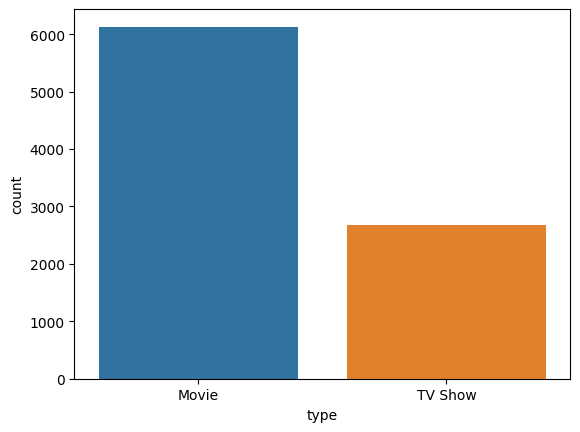

In [2274]:
#We will handle movie and TV SHOWS seperately when we need them)
# Netflix_data_movies -> Movies df
# Netflix_data_series -> TV shows df


Netflix_data_movies = Netflix_data[Netflix_data['type'] == 'Movie']

Netflix_data_movies['duration'] = Netflix_data_movies['duration'].str.split(' ').str[0]
print("The number of Movies: ")
display(Netflix_data_movies.count()[0])

Netflix_data_series = Netflix_data[Netflix_data['type'] == 'TV Show']
Netflix_data_series['duration'] = Netflix_data_series['duration'].str.split(' ').str[0]

print("The number of TV shows: ")
display(Netflix_data_series.count()[0])


sns.countplot(data=Netflix_data,x='type')
plt.show()


Average seasons for every TV show :1.764947683109118
Average mins for every movie :99.56499755341706


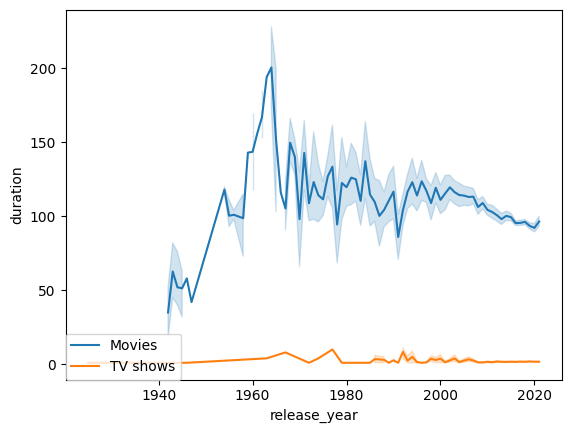

In [2275]:
Netflix_data_series['duration'] = Netflix_data_series['duration'].astype('int')
Netflix_data_movies['duration'] = Netflix_data_movies['duration'].astype('int')

#Mean time in seasons to watch a series
print("Average seasons for every TV show :" + str(Netflix_data_series["duration"].mean()))

#Mean time in seasons to watch a movie
print("Average mins for every movie :" + str(Netflix_data_movies["duration"].mean()))

sns.lineplot(data = Netflix_data_movies,
             x='release_year',
             y="duration",
             label = "Movies")
sns.lineplot(data = Netflix_data_series,
             x='release_year',
             y="duration",
             label = "TV shows")
plt.legend(loc=(0,0),ncol=1) # Legend at 0,0 location in the map

plt.show()
# As we see the duration has spiked up between 1960 and 1980, probably an outlier


In [2276]:
# Top 10 genres in Movies 
#Since we have comma seperated values for country column
Netflix_data_genres_movies = Netflix_data_movies
Netflix_data_genres_movies["listed_in"] = Netflix_data_genres_movies["listed_in"].str.split(',')

Netflix_data_genres_movies = Netflix_data_genres_movies.explode('listed_in',ignore_index=True)
Netflix_data_genres_movies["listed_in"] = Netflix_data_genres_movies["listed_in"].str.strip()
Netflix_top_genres = Netflix_data_genres_movies.groupby('listed_in').size().sort_values(ascending=False)
display(Netflix_top_genres[:10])


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
dtype: int64

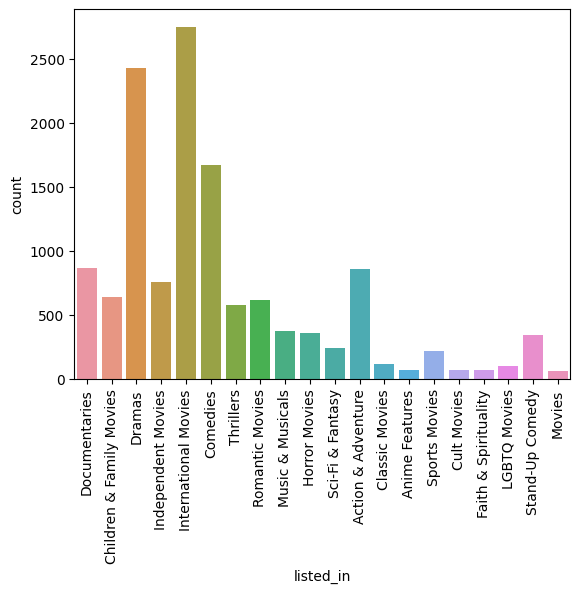

In [2277]:

sns.countplot(data= Netflix_data_genres_movies,x='listed_in')
plt.xticks(rotation = 90)
plt.show()


In [2278]:
# Top 10 genres in Series 
#Since we have comma seperated values for country column
Netflix_data_genres_series = Netflix_data_series
Netflix_data_genres_series["listed_in"] = Netflix_data_genres_series["listed_in"].str.split(',')

Netflix_data_genres_series = Netflix_data_genres_series.explode('listed_in',ignore_index=True)
Netflix_data_genres_series["listed_in"] = Netflix_data_genres_series["listed_in"].str.strip()
Netflix_top_genres = Netflix_data_genres_series.groupby('listed_in').size().sort_values(ascending=False)
Netflix_top_genres[:10]

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
dtype: int64

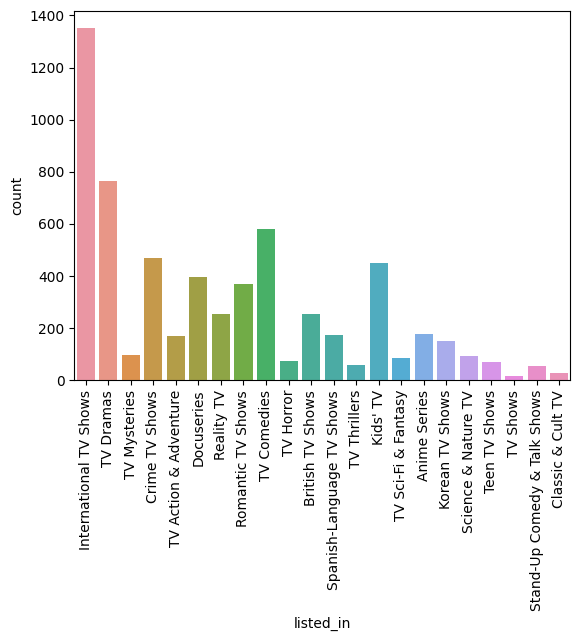

In [2260]:

sns.countplot(data= Netflix_data_genres_series,x='listed_in')
plt.xticks(rotation = 90)
plt.show()


<Axes: xlabel='release_year', ylabel='Density'>

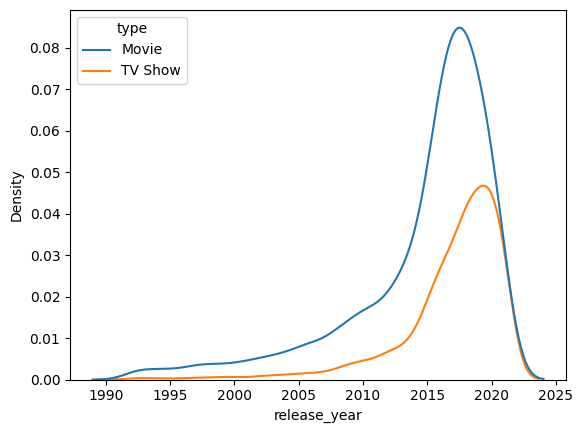

In [2280]:
#plotting it in a countplot according to the last 20-30 years
sns.kdeplot(data=Netflix_data.loc[Netflix_data['release_year']> Netflix_data['release_year'].max()-30],
              x="release_year",
              hue="type")


### How has the number of movies released per year changed over the last 20-30 years?
* From the above interpretation, The number of movies and series made have been significantly increased over time,
*  Making TV shows is not as much as series though.

<Axes: xlabel='release_year', ylabel='count'>

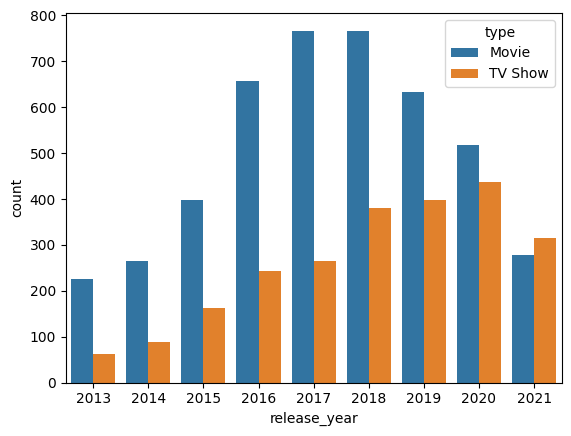

In [2286]:
### Does Netflix has more focus on TV Shows than movies in recent years?
sns.countplot(data=Netflix_data.loc[ Netflix_data['release_year']>2012],
              x="release_year",
              hue="type")


### Does Netflix has more focus on TV Shows than movies in recent years?
* As seen in the above graph, movies have been prominent and widely created until 2019.
* From 2020 it is observed to have surpased the number of movies made.
* while the overall number of movies created has reduced significantly and focus is clearly on TV series as it has surpassed the number of movies created


### Understanding what content is available in different countries

In [2307]:
top_3_rating = Netflix_data_genres_movies["rating"].value_counts().index[:3]
top_5_genre = Netflix_data_genres_movies["listed_in"].value_counts().index[:5]
top_5_country = Netflix_data_genres_movies["country"].value_counts().index[:5]

top_5_genre

Index(['International Movies', 'Dramas', 'Comedies', 'Documentaries',
       'Action & Adventure'],
      dtype='object', name='listed_in')

In [2310]:
top10_data = Netflix_data_genres_movies.loc[Netflix_data_genres_movies["rating"].isin(top_3_rating) & Netflix_data_genres_movies["listed_in"].isin(top_5_genre) & Netflix_data_genres_movies["country"].isin(top_5_country)]
top10_data

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
11,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,United States,"September 22, 2021",2020,TV-MA,67,Documentaries
12,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,United States,"September 22, 2021",2020,TV-MA,67,International Movies
17,s25,Movie,Jeans,India,"September 21, 2021",1998,TV-14,166,Comedies
18,s25,Movie,Jeans,India,"September 21, 2021",1998,TV-14,166,International Movies
30,s36,Movie,The Father Who Moves Mountains,United Kingdom,"September 17, 2021",2021,TV-MA,110,Dramas
...,...,...,...,...,...,...,...,...,...
13176,s8800,Movie,Zenda,India,"February 15, 2018",2009,TV-14,120,International Movies
13181,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158,Dramas
13183,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88,Comedies
13187,s8807,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111,Dramas


<Axes: xlabel='country', ylabel='count'>

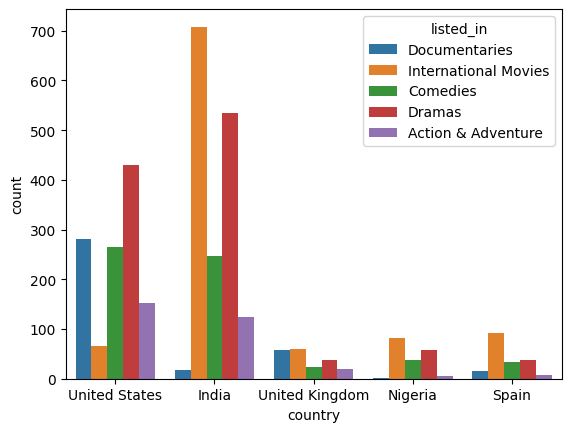

In [2311]:
sns.countplot(data=top10_data,
              x="country",
              hue="listed_in")

<Axes: xlabel='country'>

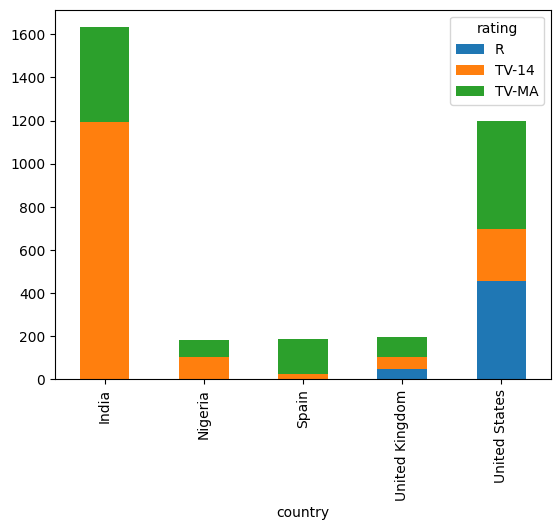

In [2315]:
#Recommended way is stacked bar chat
df_plot= top10_data.groupby(['rating','country']).size().reset_index().pivot(columns="rating",index='country',values= 0)
df_plot
df_plot.plot(kind='bar',stacked=True)

In [ ]:
#Bivariate 
sns.boxplot(data=top10_data,x="Country",y="Global_Sales")

In [ ]:

Netflix_data_series['duration'] = Netflix_data_series['duration'].astype('int')
sns.boxplot( y = 'duration',x = 'release_year' ,data = Netflix_data_series[Netflix_data_series['release_year']>2011])


### What type of content is available in different countries?

In [1692]:
#Since we have comma seperated values for country column
Netflix_data["country"] = Netflix_data["country"].str.split(',')

Netflix_data = Netflix_data.explode('country',ignore_index=True)
Netflix_data["country"] = Netflix_data["country"].str.strip()
Netflix_data[Netflix_data["country"]==" United States"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [1693]:
# Top 10 content is produced by the following countries
Netflix_top_countries = Netflix_data.groupby('country').size().sort_values(ascending=False)
Netflix_top_countries

country
United States     4055
India             1155
United Kingdom     882
Canada             486
France             425
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Somalia              1
Liechtenstein        1
Length: 123, dtype: int64

In [1694]:
# Top 10 genres is produced by the following countries
#Since we have comma seperated values for country column
Netflix_data_genres = Netflix_data
Netflix_data_genres["listed_in"] = Netflix_data_genres["listed_in"].str.split(',')

Netflix_data_genres = Netflix_data_genres.explode('listed_in',ignore_index=True)
Netflix_data_genres["listed_in"] = Netflix_data_genres["listed_in"].str.strip()
Netflix_top_genres = Netflix_data_genres.groupby('listed_in').size().sort_values(ascending=False)
Netflix_top_genres[:10]

listed_in
International Movies        3559
Dramas                      3235
Comedies                    2003
International TV Shows      1512
Action & Adventure          1186
Documentaries               1132
Independent Movies          1043
Children & Family Movies     879
TV Dramas                    872
Thrillers                    810
dtype: int64

In [1695]:
# How has the number of movies released per year changed over the last 20-30 years?
Movies_release_year_counts = Netflix_data.groupby('release_year').size().sort_values()

Movies_release_year_counts[]


release_year
1925       1
1947       1
1959       1
1966       1
1969       2
        ... 
2020    1082
2016    1165
2019    1232
2017    1299
2018    1440
Length: 74, dtype: int64

In [1361]:
# Comparison of tv shows vs. movies.



#### Visual Analysis - Univariate, Bivariate after pre-processing of the data

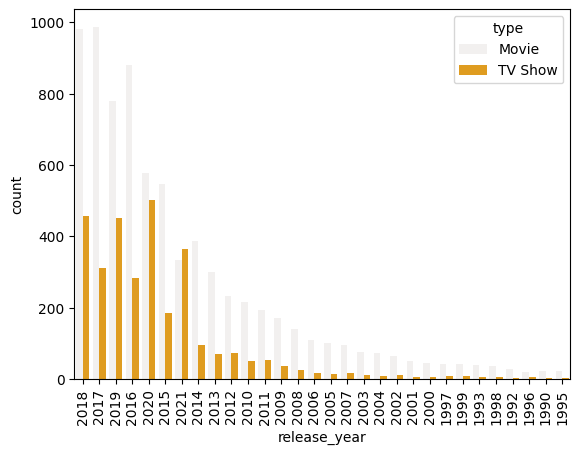

In [1696]:
# What is the best time to launch a TV show?
sns.countplot(data=Netflix_data,
              x = "release_year",
              order = Netflix_data["release_year"].value_counts("release_year")[:30].index, color = "orange",hue="type")
plt.xticks(rotation = 90)

plt.show()
#Does Netflix has more focus on TV Shows than movies in recent years?
# As seen below the best time to launch a TV show was after 2014, that's when TV shows really took off and most are made.

<Axes: xlabel='release_year', ylabel='Count'>

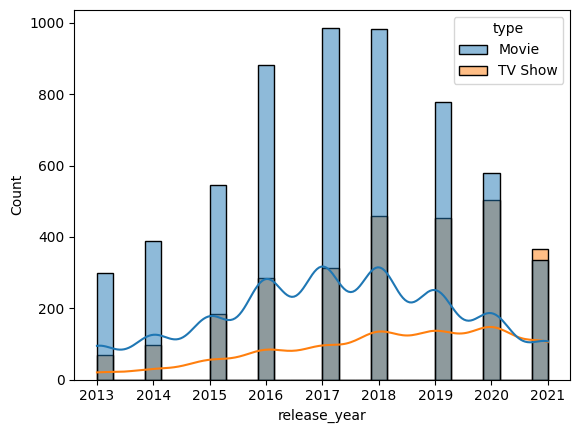

In [1697]:
#histogram

sns.histplot(data = Netflix_data[Netflix_data["release_year"]>2012], x = "release_year", kde = True,hue="type")


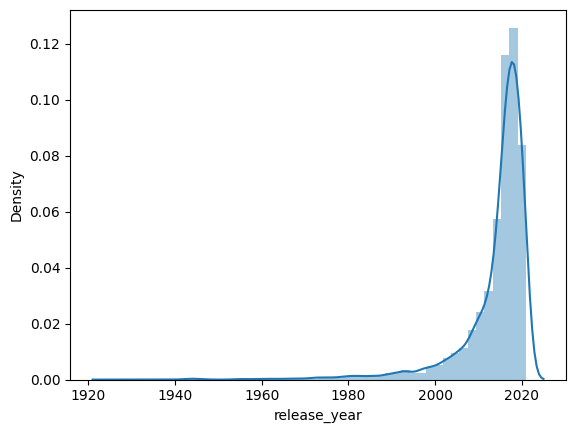

In [1698]:
plot = sns.distplot(Netflix_data["release_year"],kde=True)
plt.show()

<Axes: xlabel='type', ylabel='count'>

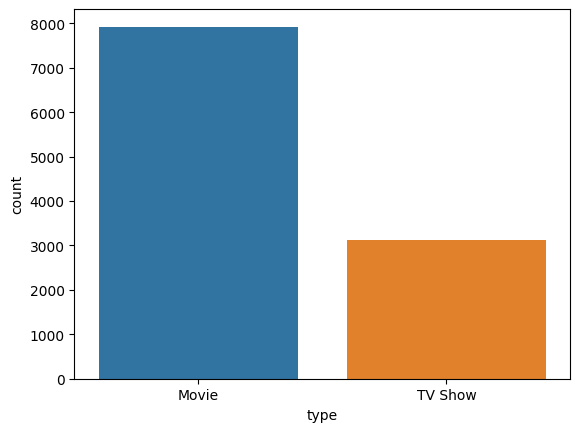

In [1699]:
#Comparison of tv shows vs. movies.
sns.countplot(data=Netflix_data,x='type')

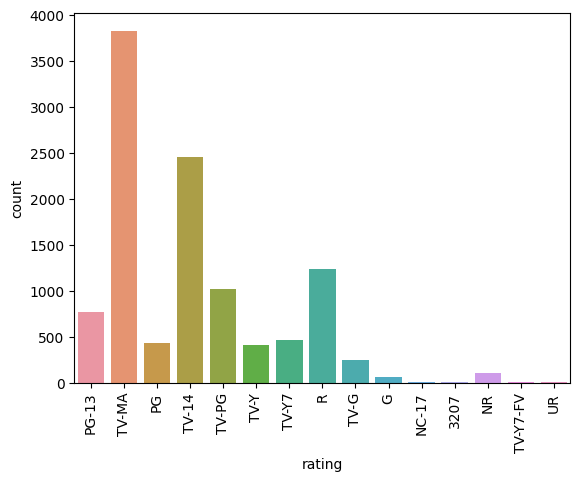

In [1700]:

sns.countplot(data=Netflix_data,x='rating')
plt.xticks(rotation = 90)
plt.show()

In [1367]:
#Comparison of tv shows vs. movies.